William Andrés Gómez R.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.datasets import make_blobs

from sklearn import svm

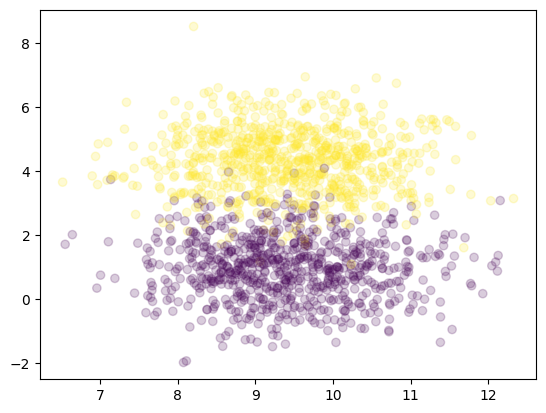

In [2]:
Xtotal, ytotal = make_blobs(n_samples = 1500, centers = 2, n_features=2, shuffle=True, random_state=4)
plt.scatter(Xtotal[:,0],Xtotal[:,1],c=ytotal,alpha=0.2)
X_train, X_test, y_train, y_test = train_test_split(Xtotal, ytotal, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Por favor abra el block de notas en ( https://colab.research.google.com/drive/11176ffp07oIlBPTXq-aXWcDhB6Tu38y9?usp=sharing ) y responda:

1. Con que funcion y en que paquete y sub paquete está ubicada la utilidad con la que generamos el conjunto de datos sintético.
2. Cuantas muestras estamos generando y cómo garantizamos que siempre se van a generar las mismas muestras siendo que estamos haciendo uso de una función en apariencia aleatoria.
3. Entre a la documentación en (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) por favor explique en detalle los argumentos:  C, kernel , degree "y cuando se usa y cuando no", gamma "y cuando se usa y cuando no", coef0 "y cuando se usa y cuando no ", probability , tol , decision_function_shape,  random_state.

## SOLUCIÓN
1. 
La función que se utiliza para generar el conjunto de datos sintético es make_blobs(), ésta se importa desde el módulo 'sklearn.datasets', que forma parte de la libreria 'sklearn'. La función se encuentra en el módulo 'sklearn.datasets', específicamente, es parte del subpaquete 'sklearn.datasets.samples_generator'.

2. 
Se están generando 1500 muestras utilizando la función make_blobs() de Scikit-learn. Esto se especifica en el argumento n_samples=1500.
Para garantizar que siempre se generan las mismas muestras, se utiliza el argumento 'random_state'. Este argumento se utiliza para inicializar el generador de números aleatorios y así garantizar que siempre se generen las mismas muestras aleatorias, lo que permite la reproducibilidad de resultados.

3. 

**C**: Es el parámetro de regularización que indica la importancia que se le da al error en la función de costo. Un valor más alto de C significa que se penaliza más el error y se obtiene un hiperplano de separación más estricto. Por otro lado, un valor más bajo de C permite que haya más puntos de entrenamiento mal clasificados, lo que da lugar a un hiperplano de separación más flexible. El valor de C se ajusta mediante validación cruzada. El valor predeterminado es 1.0.

**kernel** Es el tipo de kernel que se utiliza para mapear los datos a un espacio de características de mayor dimensión. Los tipos de kernel comúnmente utilizados son 'linear' para datos linealmente separables, 'poly' para datos no linealmente separables con grados polinomiales, 'rbf' para datos no linealmente separables con funciones de base radial, y 'sigmoid' para datos no linealmente separables con funciones sigmoides. Por defecto, su valor es 'rbf'.

**gree** Es el grado del polinomio en el caso de que se utilice un kernel polinómico ('poly'). Es decir, si se utiliza un kernel polinómico de grado 3, entonces degree=3. Este argumento se ignora para otros tipos de kernel. 

**gamma**: Este parámetro es un coeficiente del kernel utilizado para calcular la similitud entre un par de puntos de datos en el espacio de características generado por el kernel. Un valor más alto de gamma significa que la influencia de un solo punto de entrenamiento se extiende más lejos, lo que puede dar un hiperplano de separación más complejo o curvado. Por otro lado, un valor más bajo de gamma significa que la influencia de un solo punto de entrenamiento se extiende menos, lo que puede conducir a un hiperplano de separación más simple o lineal. El valor de gamma se ajusta mediante validación cruzada y su valor por defecto es 'scale'.

**coef0**: Es un coeficiente que se usa en algunos tipos de kernel ('poly' y 'sigmoid') para controlar la influencia de los términos de grado más alto en la función de decisión. Es decir,es un parámetro que se utiliza para controlar la influencia del término independiente en la función de decisión de la SVM.

**probability**: Indica si se deben calcular las probabilidades de clase junto con la predicción de clase. Se utiliza cuando se quieren las probabilidades estimadas.

**tol**: Es la tolerancia para la finalización del criterio de optimización. Un valor más alto significa que el optimizador finalizará más temprano, pero puede dar lugar a una solución menos precisa. El valor predeterminado es 1e-3.

**decision_function_shape**: Para un clasificador multicalse, se entrena un modelo que separa una clase de las demás, y luego se utiliza la salida de cada modelo para asignar una clase a un punto de datos por defecto utilizando 'ovr' (one-vs-rest). También puede utilizarse  'ovo' (one-vs-one).
**random_state**: Este parámetro especifica la semilla del generador de números aleatorios para permitir la reproducibilidad. El valor predeterminado es 'None', lo que significa que se utilizará una semilla aleatoria.



4. 

Documente y Concluya cada uno de los casos (En total son 14) haga énfasis  en resaltar la frontera de decisión (gráfica) y los valores obtenidos por las métricas. ponga en su documento de entrega las gráficas y resultados de los 14 casos. y tome una conclusión para cada uno de los kernels.




In [3]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score


kernels=['linear', 'poly', 'rbf', 'sigmoid']
    

**Kernel lineal (Opcion 1)**

In [4]:

Kernel=0
msv = svm.SVC(kernel=kernels[Kernel],gamma=0.01)
msv.fit(X_train, y_train)


SVC(gamma=0.01, kernel='linear')

matthews_corrcoef 0.8987170342729172
Accuracy 0.9493333333333334


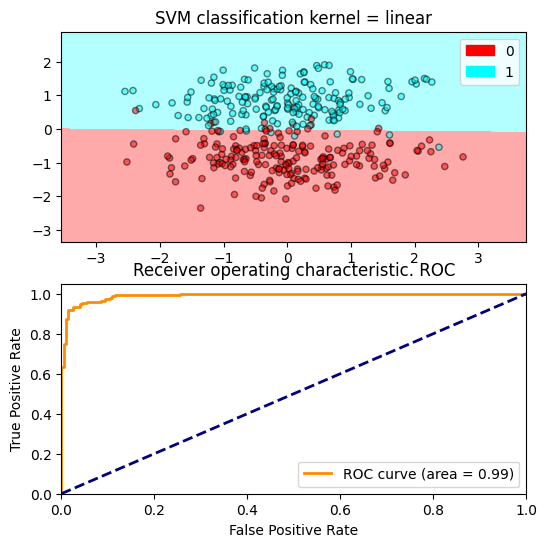

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))


X=X_test
y=y_test
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])


y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

**Conclusión**

SVC(gamma=0.01, kernel='linear')

Se crea un objeto clasificador SVM con un kernel lineal y un valor gamma de 0,01. Un valor pequeño de gamma da un límite de decisión más suave, mientras que un valor mayor hará que el límite de decisión sea más complejo y posiblemente se ajuste demasiado a los datos de entrenamiento.

Además, el coeficiente de correlación de Matthews (MCC) tiene en cuenta los verdaderos positivos, los falsos positivos, los verdaderos negativos y los falsos negativos para proporcionar una medida general de qué tan bien el modelo puede predecir las clases positivas y negativas. El MCC varía de -1 (desacuerdo total entre las predicciones y las etiquetas verdaderas) a 1 (acuerdo perfecto entre las predicciones y las etiquetas verdaderas), donde 0 indica un acuerdo aleatorio. La exactitud o 'accuracy' representa la proporción de instancias correctamente clasificadas del número total de instancias.

Matthews_corrcoef 0.8987170342729172

Accuracy 0.9493333333333334

area=0.99

Podemos ver que tanto el MCC, la exactitud y el area bajo la curva ROC nos indican que tenemos un modelo muy bueno para clasificiar las 2 categorias. Observando visualmente la gráfica podemos decir que es uno de los mejores modelos ya que no se sobreajustan a los datos y se mantiene lo más simple posible.

**Polinomial cuadrático  (Opcion 2)**

In [6]:
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=2,coef0=0) # note que coef0=0
msv.fit(X_train, y_train)

SVC(coef0=0, degree=2, kernel='poly')

matthews_corrcoef -0.013157894736842105
Accuracy 0.4666666666666667


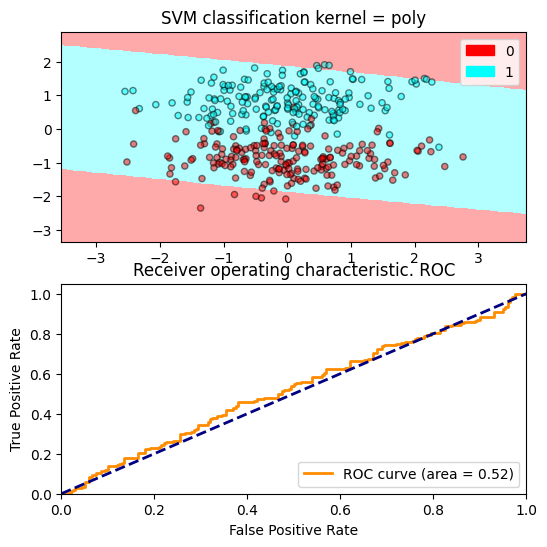

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

**Conclusión**

Se crea un objeto clasificador SVM usando un kernel polinomial con grado 2 y un valor coef0 de 0. Un  valor de 'coef0'=0 significa que el modelo no tendrá ningún sesgo, y el límite de decisión estará determinado únicamente por la relación entre las características de entrada y la variable de etiqueta. En otras palabras, el modelo intentará ajustar los datos lo mejor posible sin suposiciones previas ni sesgos hacia regiones específicas del espacio de entrada, ya que el 'bias' o sesgo es el término independiente del modelo.


Podemos ver que se genera un modelo que clasifica las 2 clases como una sola y separar en otra los valores atípicos de estas.Por esto no logra distinguir los 2 globos de datos aleatorios. 

matthews_corrcoef -0.013157894736842105

Accuracy 0.4666666666666667

area=0.52

Todos sus resultados de metricas nos indican que el calsificador tiene incluso una exactitud menor al 50% que al ser binario no es aceptable.

**Polinomial cuadrático  (Opcion 3)**

In [8]:
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=2,coef0=1) # note que coef0=1
msv.fit(X_train, y_train)

SVC(coef0=1, degree=2, kernel='poly')

matthews_corrcoef 0.8987170342729172
Accuracy 0.9493333333333334


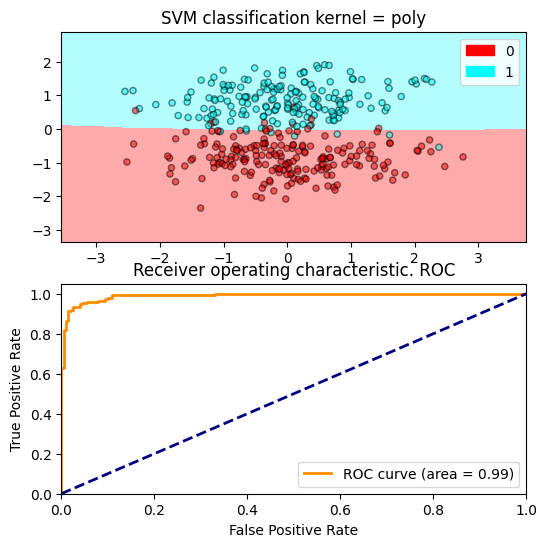

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Se crea el mismo modelo anterior pero esta vez utilizamos 'coef0'=1. De esta forma la función kernel polinomial tendrá un término de sesgo, lo que puede ayudar a capturar relaciones no lineales entre las características de entrada y la variable de etiqueta.

Se mejoró drasticamente el rendimiento del modelo. 

SVC(coef0=1, degree=2, kernel='poly')

matthews_corrcoef 0.8987170342729172

Accuracy 0.9493333333333334

area=0.99

Se obtienen los mismos resultados en sus metricas que el modelo más sencillo de la opción 1.

**Polinomial cúbico  (Opcion 4)**

In [10]:
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=3,coef0=0) # note que coef0=0
msv.fit(X_train, y_train)

SVC(coef0=0, kernel='poly')

matthews_corrcoef 0.8844596813199741
Accuracy 0.9413333333333334


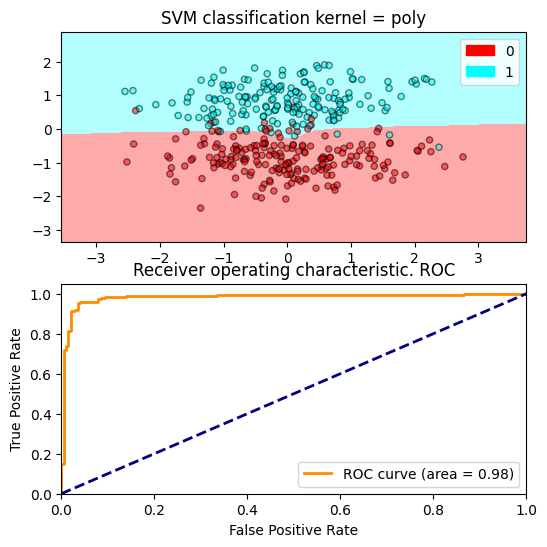

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Esta vez el grado del kernel polinomial se ha subido a 3. Sin utilizar un termino de sesgo hemos obtenido un modelo bastante descente, solo un poco inferior en sus metricas con respecto a los modelos anteriores pero bastante bueno.

Podemos ver que el efecto de subir el grado del kernel polinomial ha tenido un efecto positivo. 

SVC(coef0=0, kernel='poly')

matthews_corrcoef 0.8844596813199741

Accuracy 0.9413333333333334

area=0.98

**Polinomial cuadrático  (Opcion 5)**

In [12]:
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=3,coef0=1) # note que coef0=1
msv.fit(X_train, y_train)

SVC(coef0=1, kernel='poly')

matthews_corrcoef 0.8984390136151955
Accuracy 0.9493333333333334


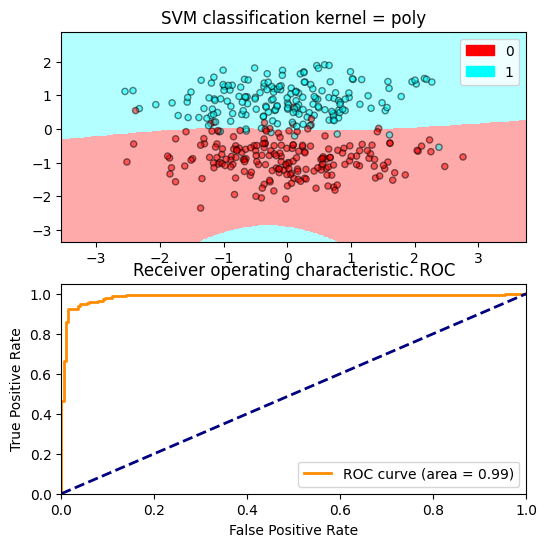

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Observamos esta vez en este modelo que mantenemos el grado polinomial del kernel en 3 pero colocamos el parametro coef0=1. Esto permite capturar mejor las no linealidades y el rendimiento sube. Sin embargo, podemos ver en la gráfica que hay una zona azul en la parte inferior que no debería estar ahí. Esto se debe a que a mayor coef0, mayor sera el sobre ajsute.

SVC(coef0=1, kernel='poly')

matthews_corrcoef 0.8984390136151955

Accuracy 0.9493333333333334

area=0.99

**Polinomial orden 4  (Opcion 6)**

In [14]:

Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=4,coef0=0) # note que coef0=0
msv.fit(X_train, y_train)

SVC(coef0=0, degree=4, kernel='poly')

matthews_corrcoef -0.051145643599609374
Accuracy 0.45866666666666667


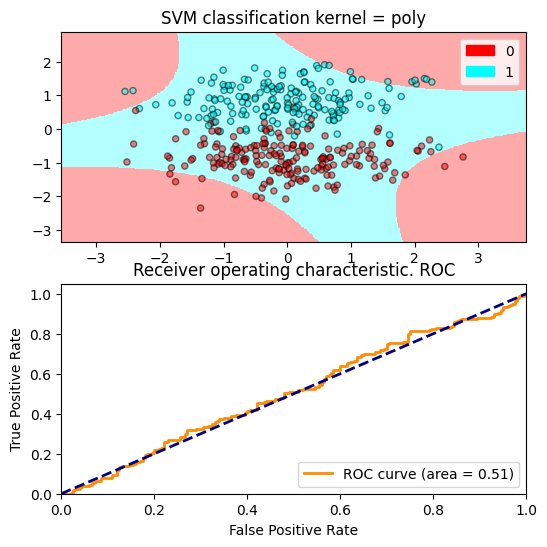

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Subiendo una vez más el grado del kernel esta vez a 4, vemos que el modelo falla en predecir las calses verdaderas y crea regiones de decision muy incorrectas, debido al alto grado del polinomio que se ve restringido sin un sesgo que capture las no linealidades.

SVC(coef0=0, degree=4, kernel='poly')

matthews_corrcoef -0.051145643599609374

Accuracy 0.45866666666666667

area=0.51

**Polinomial orden 4  (Opcion 7)**

In [16]:
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=4,coef0=1) # note que coef0=1
msv.fit(X_train, y_train)

SVC(coef0=1, degree=4, kernel='poly')

matthews_corrcoef 0.8984390136151955
Accuracy 0.9493333333333334


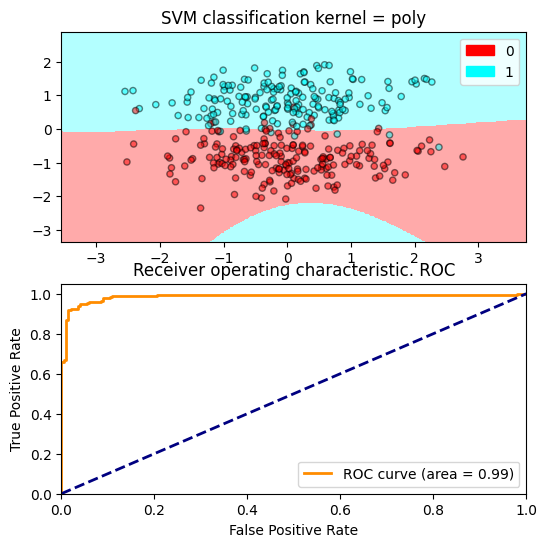

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Acá vemos el efecto del termino independiete o sesgo en el modelo que permite que el kernel polinomial de grado 4 se ajsute de mejor forma a que si no existiera el termino independiente.

El modelo es bastante bueno e igual en rendimiento a los anteriores.

SVC(coef0=1, degree=4, kernel='poly')

matthews_corrcoef 0.8984390136151955

Accuracy 0.9493333333333334

area=0.99

**RBF  (Opcion 8)**

In [18]:
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma='scale')
msv.fit(X_train, y_train)

SVC()

El valor 'scale' en gamma indica que se ajuste el valor de gamma automáticamente en función de la escala de los datos. 

matthews_corrcoef 0.8987170342729172
Accuracy 0.9493333333333334


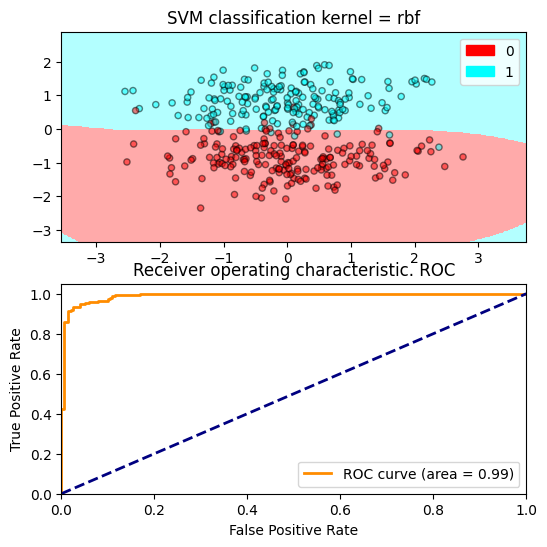

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Se crea un modelo SVM utilizando un kernel de función de base radial (RBF) con el parámetro del núcleo establecido en 'rbf'. 
El valor de 'scale' se utiliza para determinar automáticamente un valor adecuado de gamma en función de los datos de entrada.


El modelo es muy bueno y tiene una fromtera de decisión simple pero eficiente.

SVC()

matthews_corrcoef 0.8987170342729172

Accuracy 0.9493333333333334

area=0.99

**RBF  (Opcion 9. concluir de los casos 9 al 13 que función tiene gamma )**

In [20]:
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma=(1/2)*0.1)#cambiar el valor de gamma entre 10, 100 y 1000
msv.fit(X_train, y_train)

SVC(gamma=0.05)

matthews_corrcoef 0.8935459795730767
Accuracy 0.9466666666666667


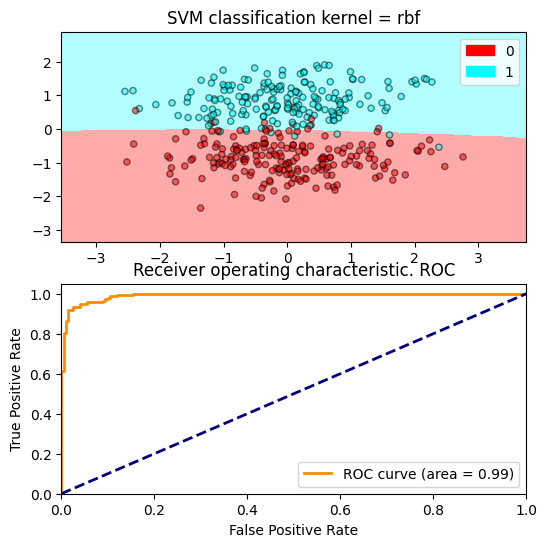

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Un valor bajo de gamma da una función gaussiana más amplia y un límite de decisión más suave, un valor mayor de gamma da  una función gaussiana más estrecha y un límite de decisión más complejo que puede ajustarse mejor a los datos de entrenamiento.

De esta forma vemos que con un gamma de 0.05 el limite de decisión es simple y efectivo.

SVC(gamma=0.05)
matthews_corrcoef 0.8935459795730767
Accuracy 0.9466666666666667
area=0.99

**RBF  (Opcion 10)**

In [22]:
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma=(1/2)*1)#cambiar el valor de gamma  entre 10, 100 y 1000
msv.fit(X_train, y_train)

SVC(gamma=0.5)

matthews_corrcoef 0.8987170342729172
Accuracy 0.9493333333333334


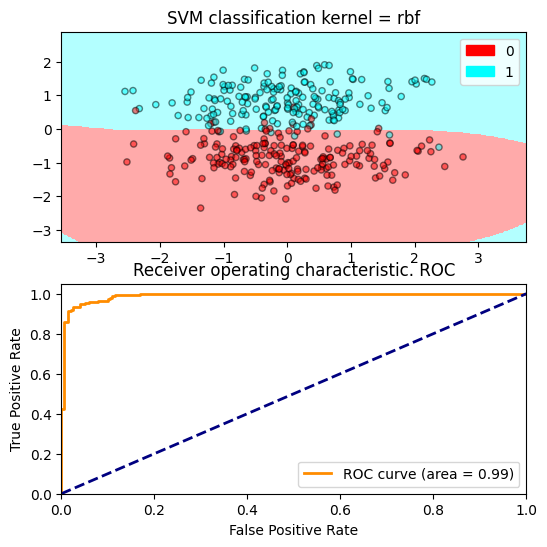

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Con un gamma 10 veces más grande que el anterior podemos ver que se ajustan un poco mejor los datos pero la frontera de decisión es un poco más compleja que la anterior. 

SVC(gamma=0.5)

matthews_corrcoef 0.8987170342729172

Accuracy 0.9493333333333334

area=0.99

**RBF  (Opcion 11)**

In [24]:
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma=(1/2)*10)
msv.fit(X_train, y_train)

SVC(gamma=5.0)

matthews_corrcoef 0.9036920545026352
Accuracy 0.952


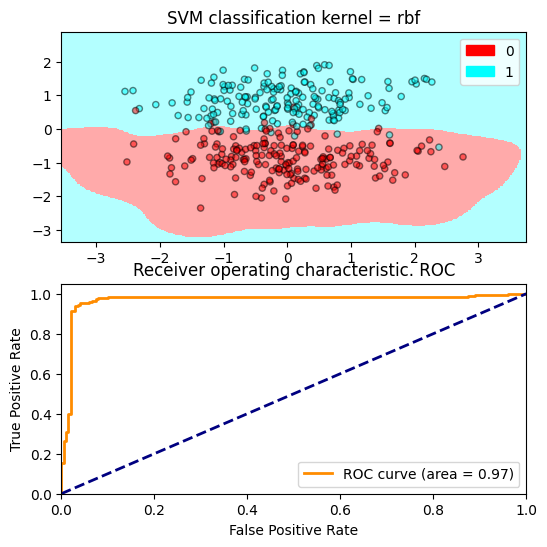

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

En este caso con un gamma de 5 se obtiene un mejor MCC y exactitud, mejor de lo que se haya conseguido en algún modelo hasta el momento, pero el area bajo ROC disminuye. Ademásse observa que hay mayor overfitting que en los casos anteriores, ya que la región azul esta ahora por debajo de la roja tambien. 

SVC(gamma=5.0)

matthews_corrcoef 0.9036920545026352

Accuracy 0.952

area=0.97

**RBF  (Opcion 12)**

In [26]:

Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma=(1/2)*100)#cambiar el valor de gamma  entre 10, 100 y 1000
msv.fit(X_train, y_train)

SVC(gamma=50.0)

matthews_corrcoef 0.9035544396288606
Accuracy 0.952


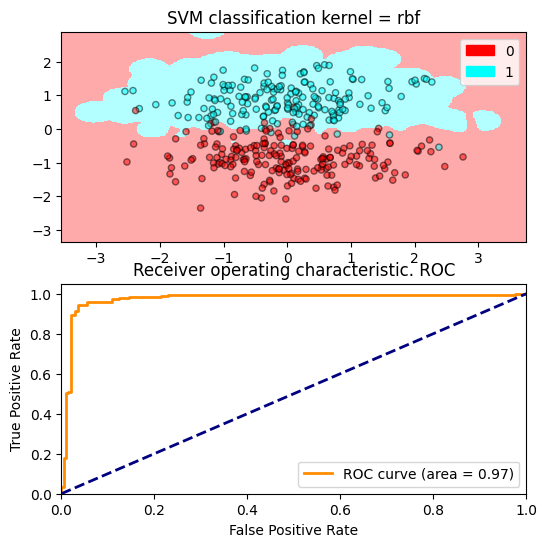

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

En este caso con un gamma de 50 se nota claramente el sobreajuste del modelo a los datos, la frontera de decisión es bastante compleja pero se obtienen unas métrica muy buenas.

Sin emabrgo podemos observar que el sobrejauste y la complejidad del modelo es mayor de lo visto hasta el momento.

SVC(gamma=50.0)

matthews_corrcoef 0.9035544396288606

Accuracy 0.952

area=0.97

**rbf  (Opcion 13)**

In [28]:
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma=(1/2)*1000)
msv.fit(X_train, y_train)

SVC(gamma=500.0)

matthews_corrcoef 0.7736375272208424
Accuracy 0.88


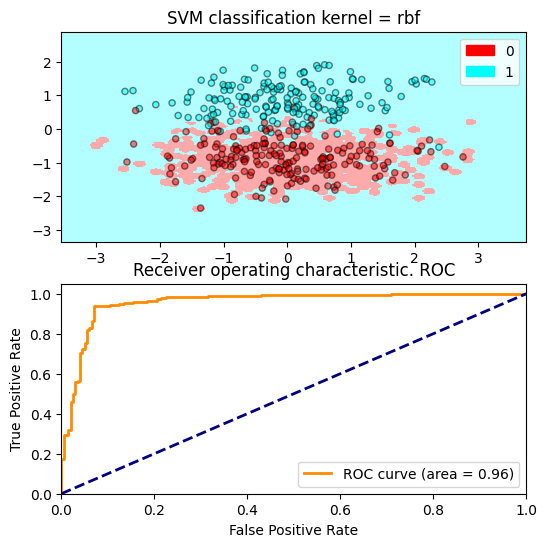

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

Por útlimo con un gamma de 500 el rendimiento de las métricas cae notablemente pero la complejidad de la frontera de decisión y el sobrejuste del model a los datos es ahora crítico y muy grande.

SVC(gamma=500.0)

matthews_corrcoef 0.7736375272208424

Accuracy 0.88

area=0.96

**sigmoide (Opcion 14)**

In [30]:
Kernel=3  
msv = svm.SVC(kernel=kernels[Kernel],gamma="auto")
msv.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

matthews_corrcoef 0.8125785922260189
Accuracy 0.9066666666666666


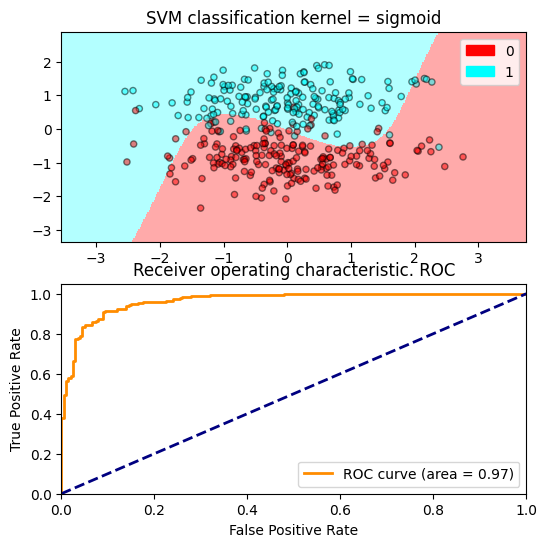

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

X=X_test
y=y_test
h = .02 
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = msv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20,alpha=0.5)
axs[0].set_xlim(xx.min(), xx.max())
axs[0].set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
axs[0].legend(handles=[patch0, patch1])
axs[0].set_title("SVM classification kernel = %s"% kernels[Kernel])

y_test_predicted = msv.predict(X_test)
y_test_scores = msv.decision_function(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores)
roc_auc=roc_auc_score(y_test, y_test_scores)
lw = 2
axs[1].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Receiver operating characteristic. ROC')
axs[1].legend(loc="lower right")

En este último caso, tenemos la función con un kernel sigmoide es una función no lineal que se puede usar para manejar conjuntos de datos separables no linealmente. Aquí, la función de decisión se basa en la función tangente hiperbólica, que se aplica al producto escalar de las muestras de entrada.

El parámetro gamma se establece en 'automático', lo que significa que el valor de gamma se determina automáticamente en función del inverso del número de características en los datos de entrada. Este método de escalado se usa a menudo para mejorar el rendimiento del modelo SVM al evitar el sobreajuste y el ajuste insuficiente.

A pesar de esto, podemos ver que el rendiminto del modelo con el gamma establecido no es muy adecuado y esto se ve reflejado en las distintas métricas. 

Hace falta ajustar los valores de gamma para poder juzgar este kernel sigmoide. SIn emabrgo vemos que por el momento no se desempeña adecuadamente. 

SVC(gamma='auto', kernel='sigmoid')

matthews_corrcoef 0.8125785922260189

Accuracy 0.9066666666666666

area=0.97

**FIN** 